<a href="https://colab.research.google.com/github/dsri07/Electricity-Transformer-Temperature-ETT-Analysis-using-Markov-Transition-Field-MTF-/blob/main/Copy_of_Untitled8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ANALYSIS OF ELECTRICAL TRANSFORMER TEMPERATURE USING MARKOV TRANSISTION FIELD AND FORECASTING OF TEMPERATURE USING ARIMA MODELLING

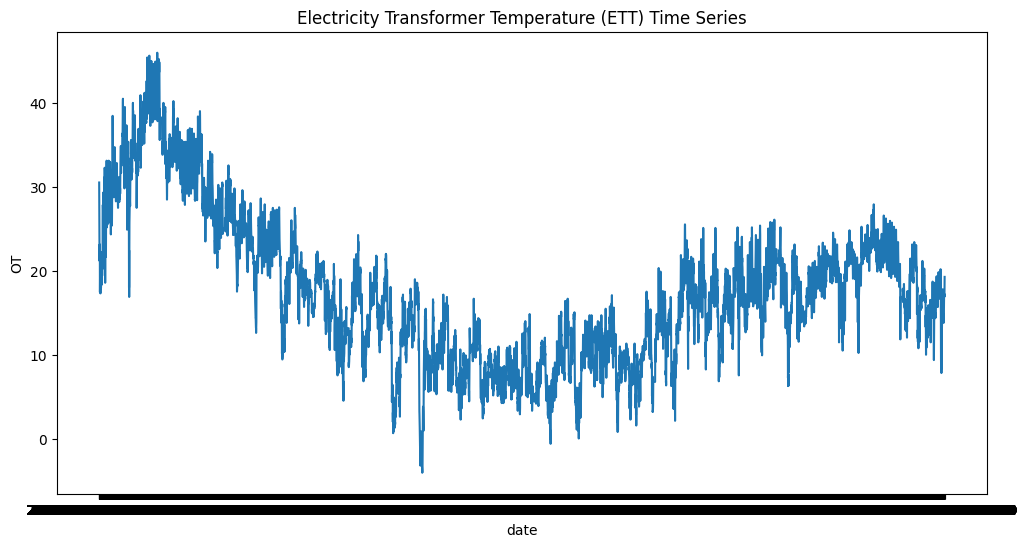

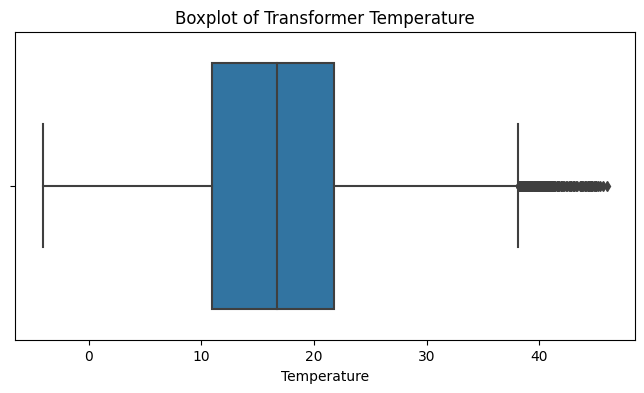

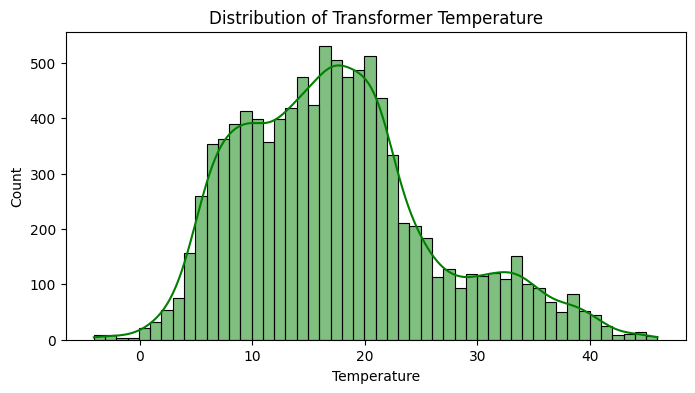

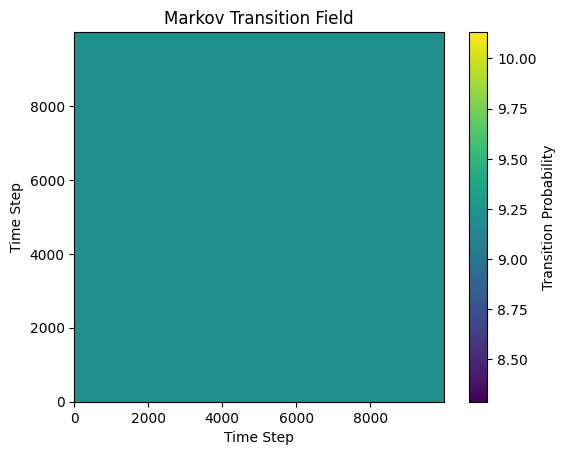

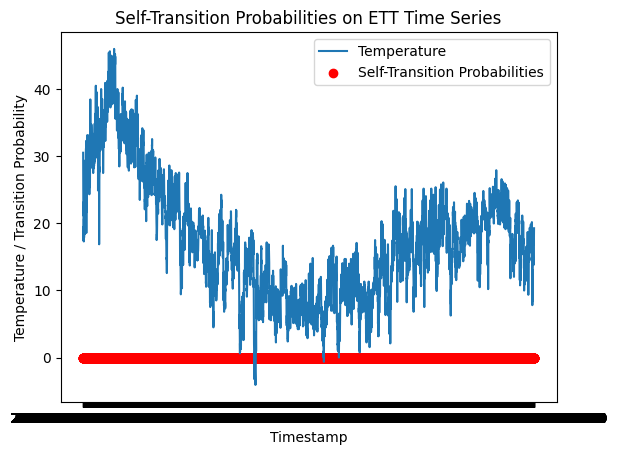

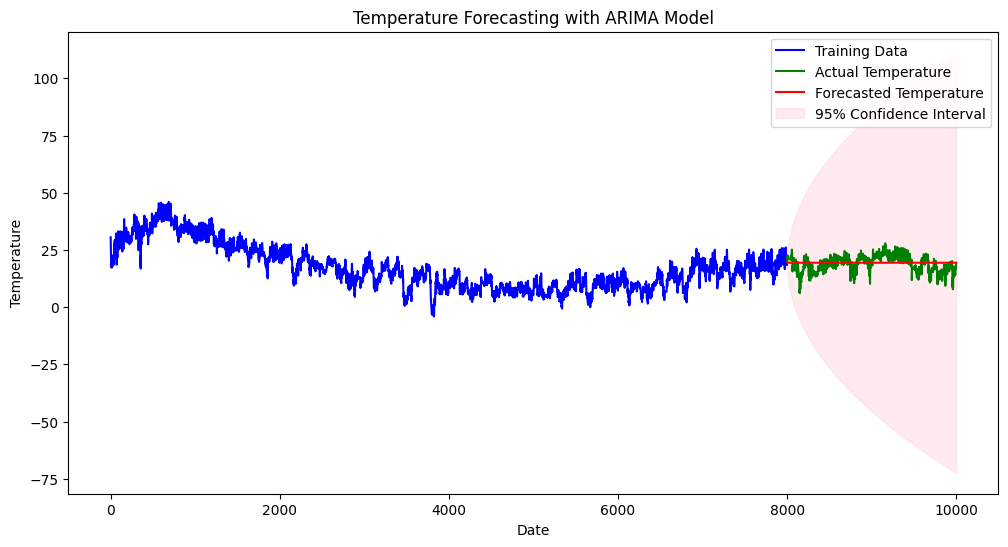

Root Mean Squared Error (RMSE): 3.346417992845904


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import KBinsDiscretizer
#import pandas as pd
#import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# Task 2: Import the Time Series Dataset
# Replace 'ett_data.csv' with your actual file path
s = pd.read_csv('/content/ETTh1 (1).csv')
df=s.iloc[:10000, :].copy()[['date','OT']]
# Task 3: Truncate and Plot the DataFrame
# Assuming your dataset has a 'timestamp' column and a 'temperature' column
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['OT'])
plt.xlabel('date')
plt.ylabel('OT')
plt.title('Electricity Transformer Temperature (ETT) Time Series')
plt.show()

# Plot a boxplot to identify outliers
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['OT'])
plt.title('Boxplot of Transformer Temperature')
plt.xlabel('Temperature')
plt.show()

# Visualize the distribution of temperatures
plt.figure(figsize=(8, 4))
sns.histplot(df['OT'], kde=True, color='green')
plt.title('Distribution of Transformer Temperature')
plt.xlabel('Temperature')
plt.show()

# Task 4: Discretize the Data
# Assuming 'temperature' is the column containing temperature values
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
df['temperature_discrete'] = discretizer.fit_transform(df[['OT']])

# Task 5: Create the Adjacency Matrix
# Function to calculate transition probability between two discrete states
def calculate_transition_probability(state_i, state_j):
    # Implement your transition probability calculation here
    # For example, you can use the frequency of transitions in the data
    return 0.2  # Replace with your actual calculation

# Create an empty adjacency matrix
adjacency_matrix = np.zeros((len(df), len(df)))

# Populate the adjacency matrix
for i in range(len(df)):
    for j in range(len(df)):
        adjacency_matrix[i, j] = calculate_transition_probability(df['temperature_discrete'][i], df['temperature_discrete'][j])

# Task 6: Calculate the Markov Matrix
markov_matrix = adjacency_matrix / np.sum(adjacency_matrix, axis=1, keepdims=True)

# Task 7: Create the Markov Transition Field
mtf = -np.log(markov_matrix)  # Use negative log to emphasize differences

# Task 8: Visualize the Markov Transition Field
plt.imshow(mtf, cmap='viridis', origin='lower')
plt.title('Markov Transition Field')
plt.colorbar(label='Transition Probability')
plt.xlabel('Time Step')
plt.ylabel('Time Step')
plt.show()

# Task 10: Plot Self-Transition Probabilities on Time Series Data
self_transition_probabilities = np.diagonal(markov_matrix)

# Plotting self-transition probabilities on the original time series data
plt.plot(df['date'], df['OT'], label='Temperature')
plt.scatter(df['date'], self_transition_probabilities, color='red', label='Self-Transition Probabilities', marker='o')
plt.xlabel('Timestamp')
plt.ylabel('Temperature / Transition Probability')
plt.title('Self-Transition Probabilities on ETT Time Series')
plt.legend()
plt.show()

# Split the data into training and testing sets
train_size = int(len(df) * 0.8)
train, test = df[0:train_size], df[train_size:]

# Train an ARIMA model
model = ARIMA(train['OT'].values, order=(5, 1, 0))

model_fit = model.fit()

# Forecast temperatures
forecast = model_fit.get_forecast(steps=len(test["OT"]))

# Extracting forecasted values, standard errors, and confidence intervals
forecast_values = forecast.predicted_mean
stderr = forecast.se_mean
conf_int = forecast.conf_int()


# Plot the forecast against the actual values
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['OT'], label='Training Data', color='blue')
plt.plot(test.index, test["OT"],label='Actual Temperature', color='green')
plt.plot(test.index, forecast_values, label='Forecasted Temperature', color='red')
plt.fill_between(test.index, conf_int[:, 0], conf_int[:, 1], color='pink', alpha=0.3, label='95% Confidence Interval')
plt.title('Temperature Forecasting with ARIMA Model')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()

# Evaluate the model performance
rmse = sqrt(mean_squared_error(test["OT"], forecast_values))
print(f'Root Mean Squared Error (RMSE): {rmse}')